# Data Gap Analysis
Heatmaps of the LineP 1990 to 2019 '.csv'

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [13]:
df = pd.read_csv ('/home/amh001/work_fs7/DATA/LINEP/LineP_for_Data_Synthesis_1990-2019_v1.csv')


df[df==-999]=np.nan
df['CTDTMP_ITS90_DEG_C'].count()

4508

In [4]:
# How many total rows?
print(df.shape)

# Check non-null counts for TDTMP_ITS90_DEG_C
print(df['CTDTMP_ITS90_DEG_C'].count())

# Check unique years and months
print(df['YEAR_UTC'].unique())
print(df['MONTH_UTC'].unique())

(4983, 47)
4508
[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2010 2014 2013 2015 2016 2017 2018 2019]
[ 5  8  9 10  2  3  6]


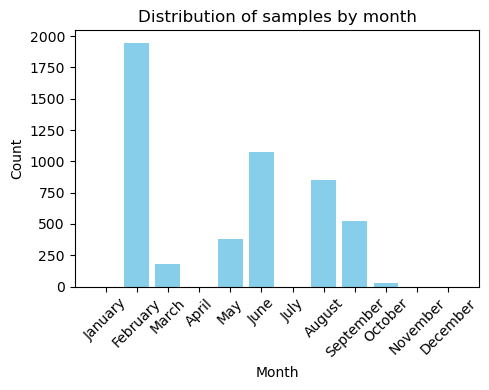

In [5]:
from collections import Counter
# Extract month names
months =df.MONTH_UTC

# Count the occurrences of each month
# Count occurrences of each month
month_counts = Counter(months)
# Prepare month names for plotting
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Sort months based on the natural order (1 - 12)
sorted_months = [month_names[i - 1] for i in range(1, 13)]
sorted_counts = [month_counts.get(i, 0) for i in range(1, 13)]

# Plot
plt.figure(figsize=(5, 4))
plt.bar(sorted_months, sorted_counts, color='skyblue')
plt.title('Distribution of samples by month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

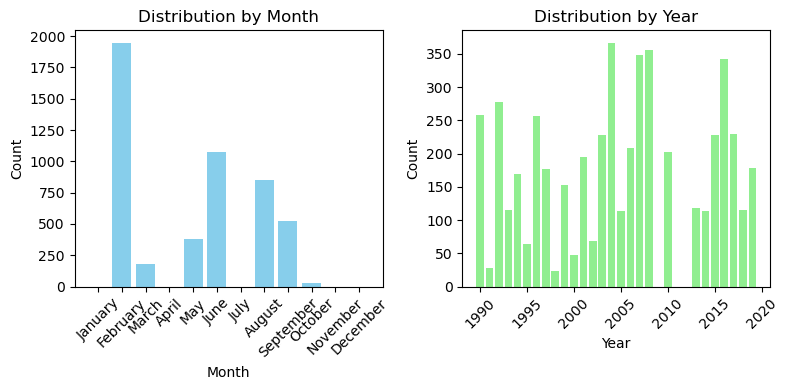

In [6]:

months =df.MONTH_UTC
years =df.YEAR_UTC

# Count occurrences
month_counts = Counter(months)
year_counts = Counter(years)

# Prepare labels
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
sorted_months = [month_names[i - 1] for i in range(1, 13)]
sorted_month_counts = [month_counts.get(i, 0) for i in range(1, 13)]

sorted_years = sorted(year_counts.keys())
sorted_year_counts = [year_counts[y] for y in sorted_years]

# Plot both distributions
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Monthly distribution
axs[0].bar(sorted_months, sorted_month_counts, color='skyblue')
axs[0].set_title('Distribution by Month')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)

# Yearly distribution
axs[1].bar(sorted_years, sorted_year_counts, color='lightgreen')
axs[1].set_title('Distribution by Year')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


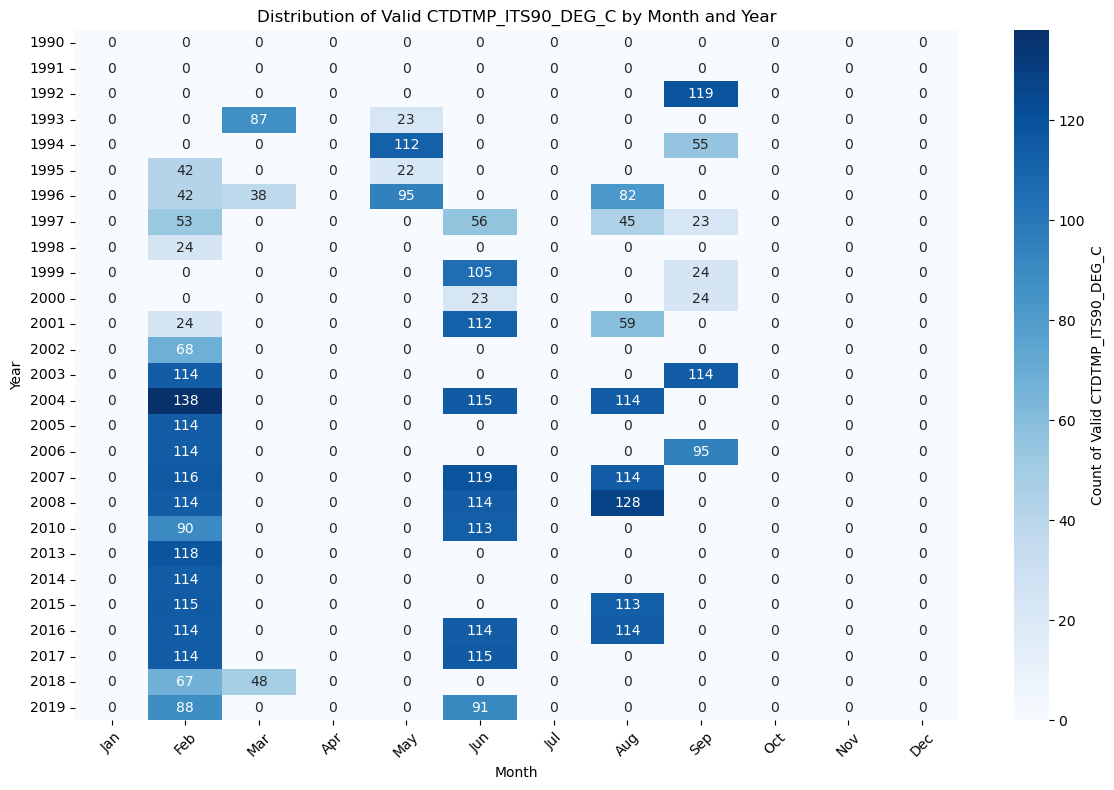

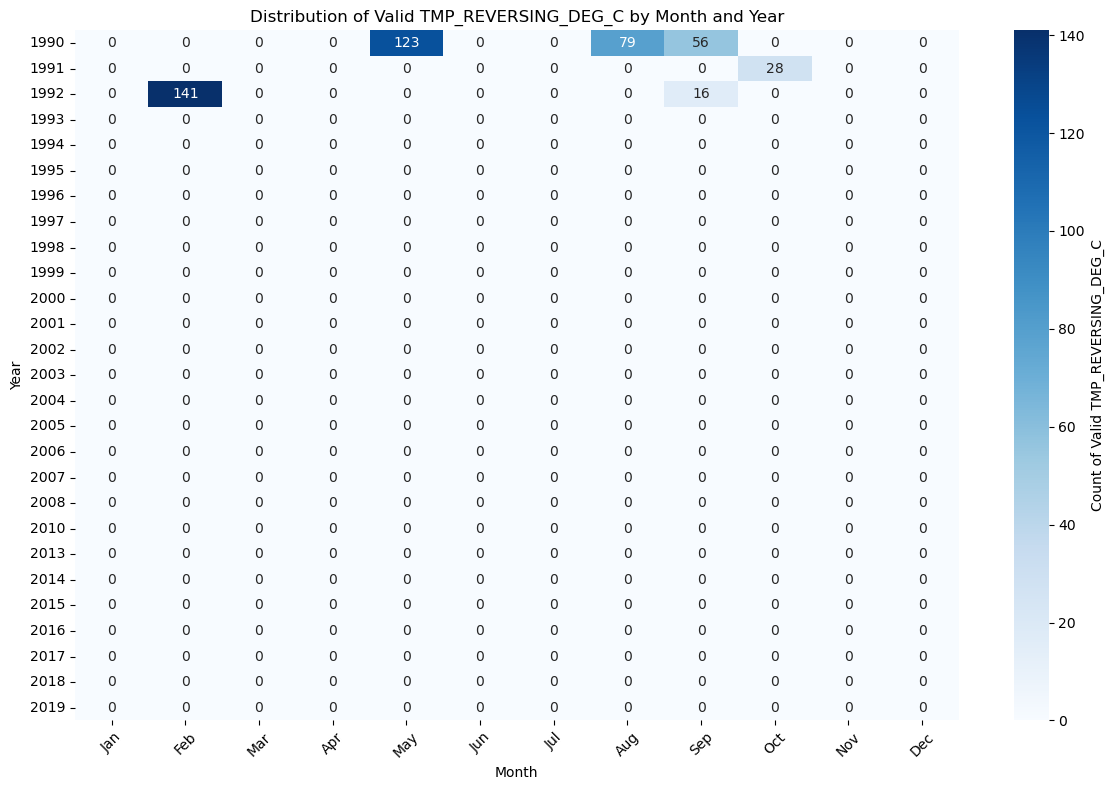

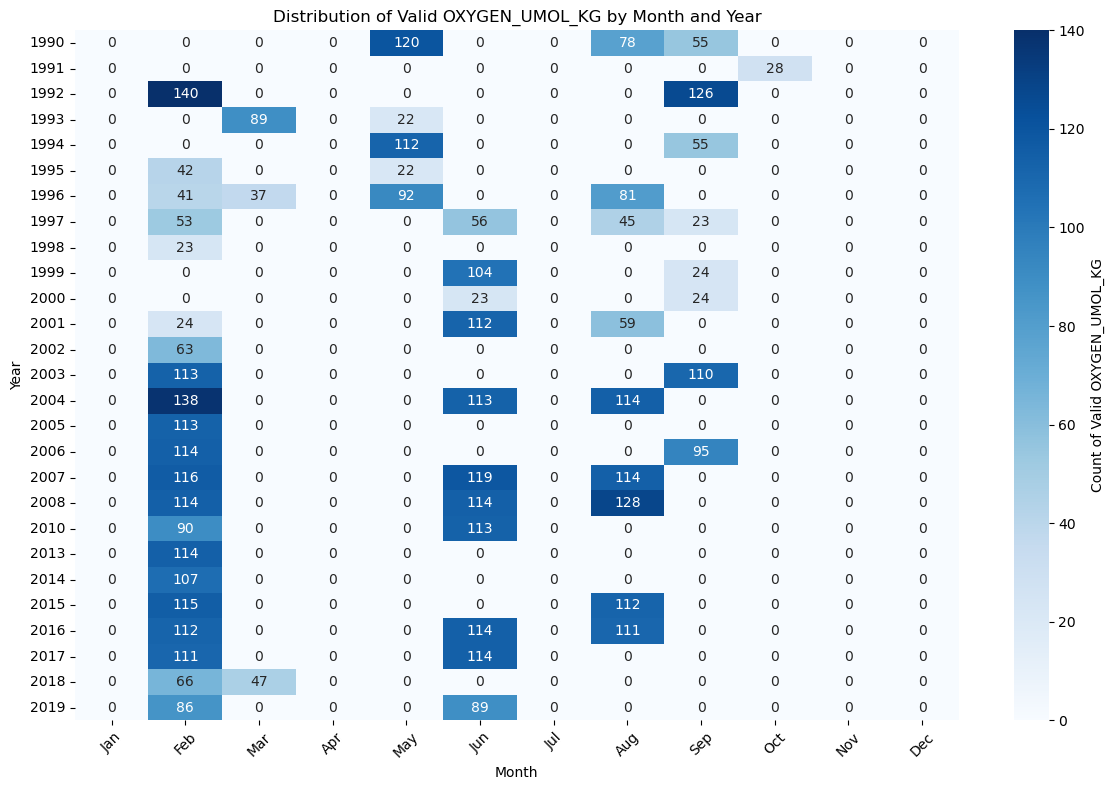

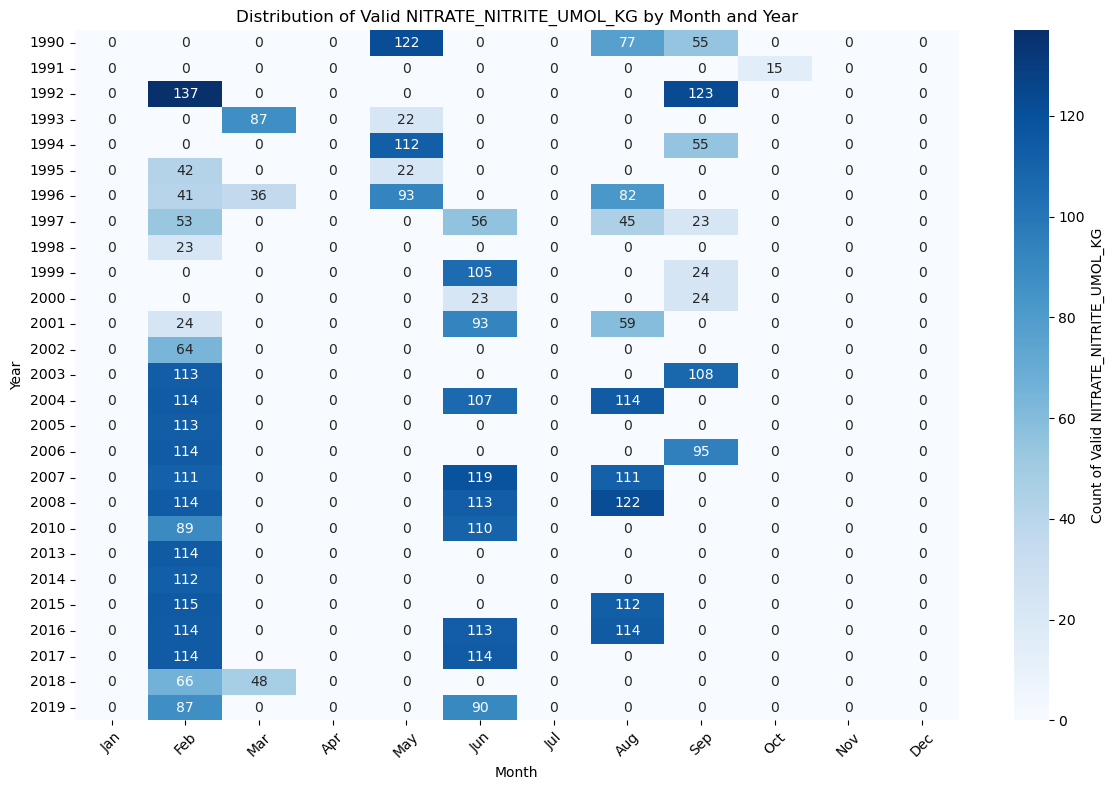

In [8]:
# Ensure all months are represented
def create_full_heatmap(df, column):
    # Group by year and month, count non-null values
    counts = df.groupby(['YEAR_UTC', 'MONTH_UTC'])[column].count().unstack(fill_value=0)
    
    # Ensure all months (1-12) are present
    counts = counts.reindex(columns=range(1, 13), fill_value=0)
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(counts, cmap='Blues', annot=True, fmt='d',
                cbar_kws={'label': f'Count of Valid {column}'})
    
    plt.title(f'Distribution of Valid {column} by Month and Year')
    plt.xlabel('Month')
    plt.ylabel('Year')
    plt.xticks(ticks=[i + 0.5 for i in range(12)],
               labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
               rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    #plt.savefig(f'heatmap_{column}_valid_count_2.png', format='png', bbox_inches='tight', transparent=False, dpi=150)
    plt.close()

# Example usage for multiple columns
columns_to_plot = ['CTDTMP_ITS90_DEG_C' ,'TMP_REVERSING_DEG_C', 'OXYGEN_UMOL_KG', 'NITRATE_NITRITE_UMOL_KG']

for column in columns_to_plot:
    create_full_heatmap(df, column)

# keep only the measurements that are "acceptable"

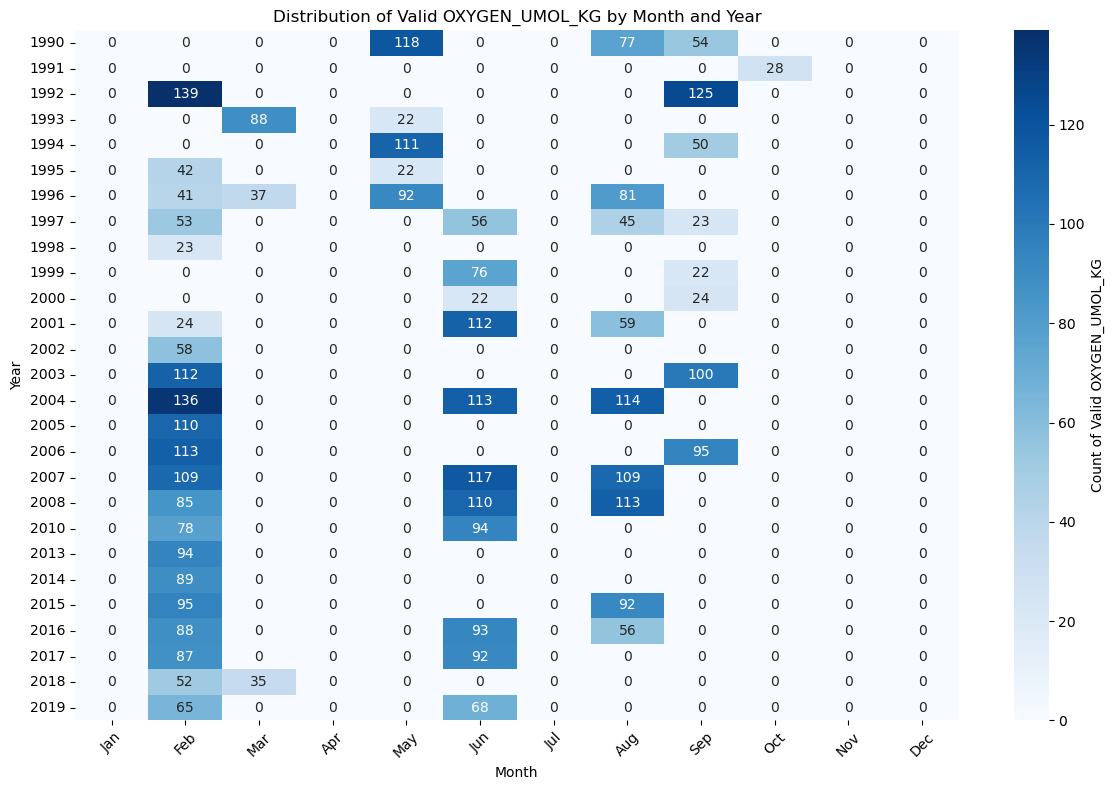

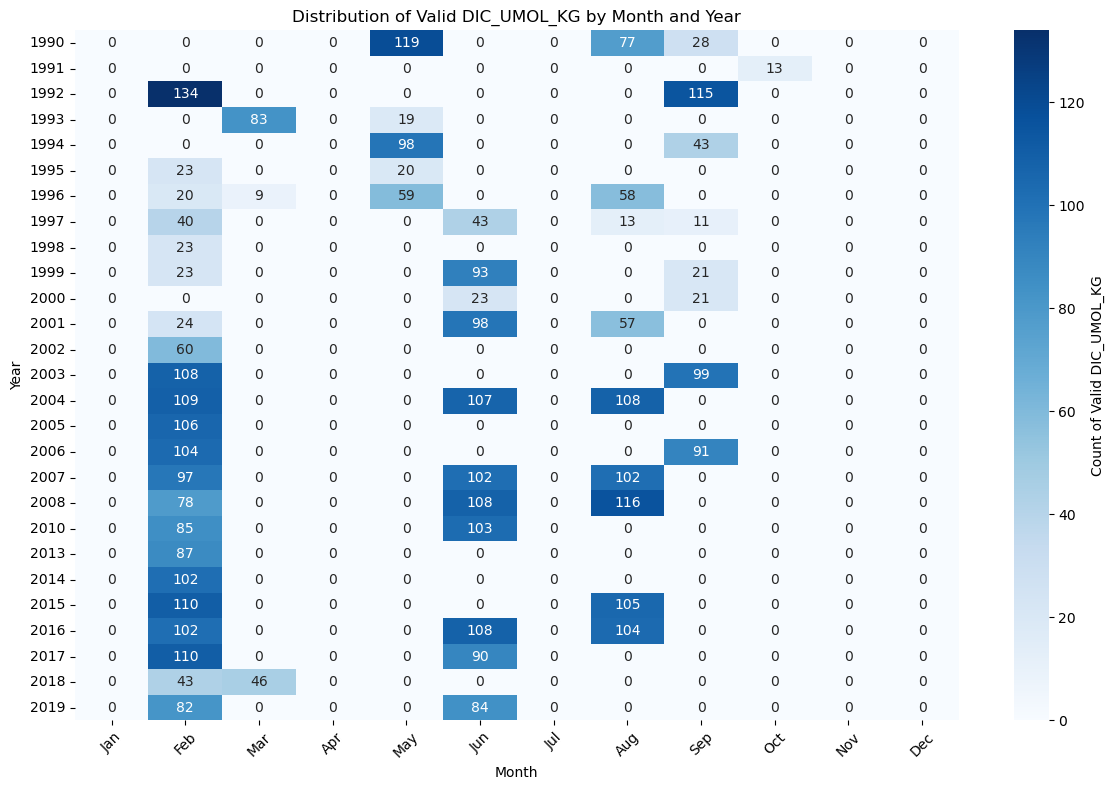

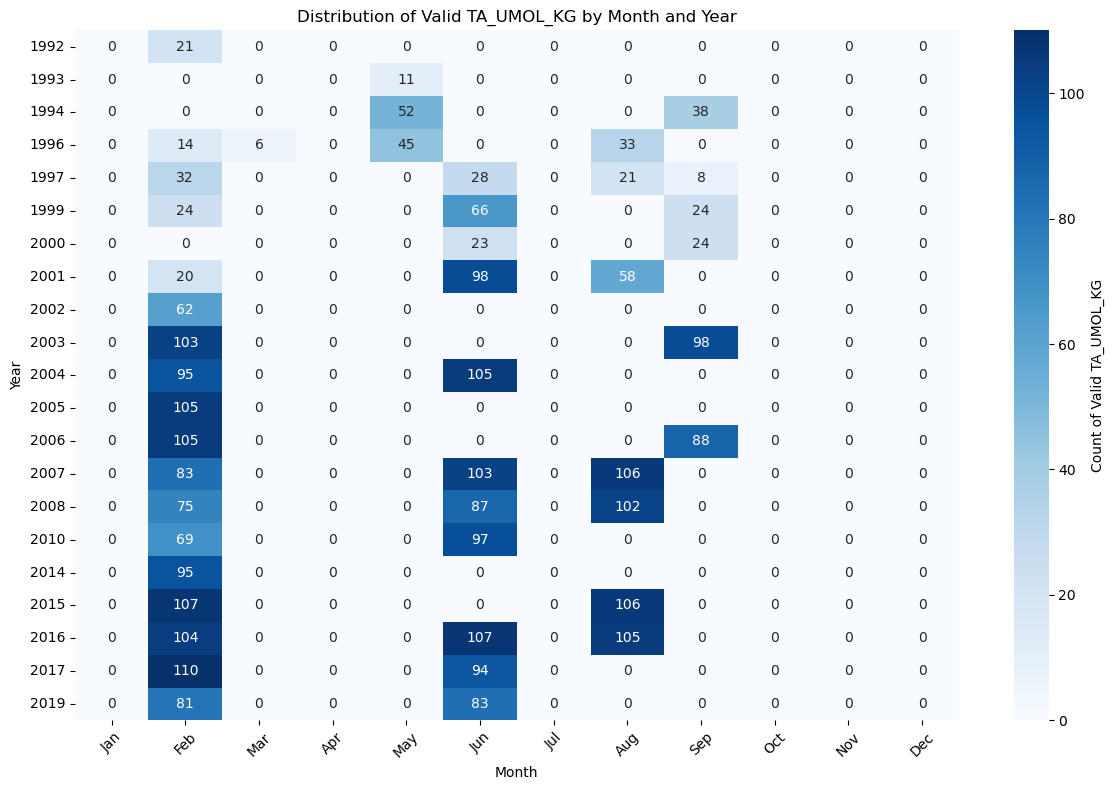

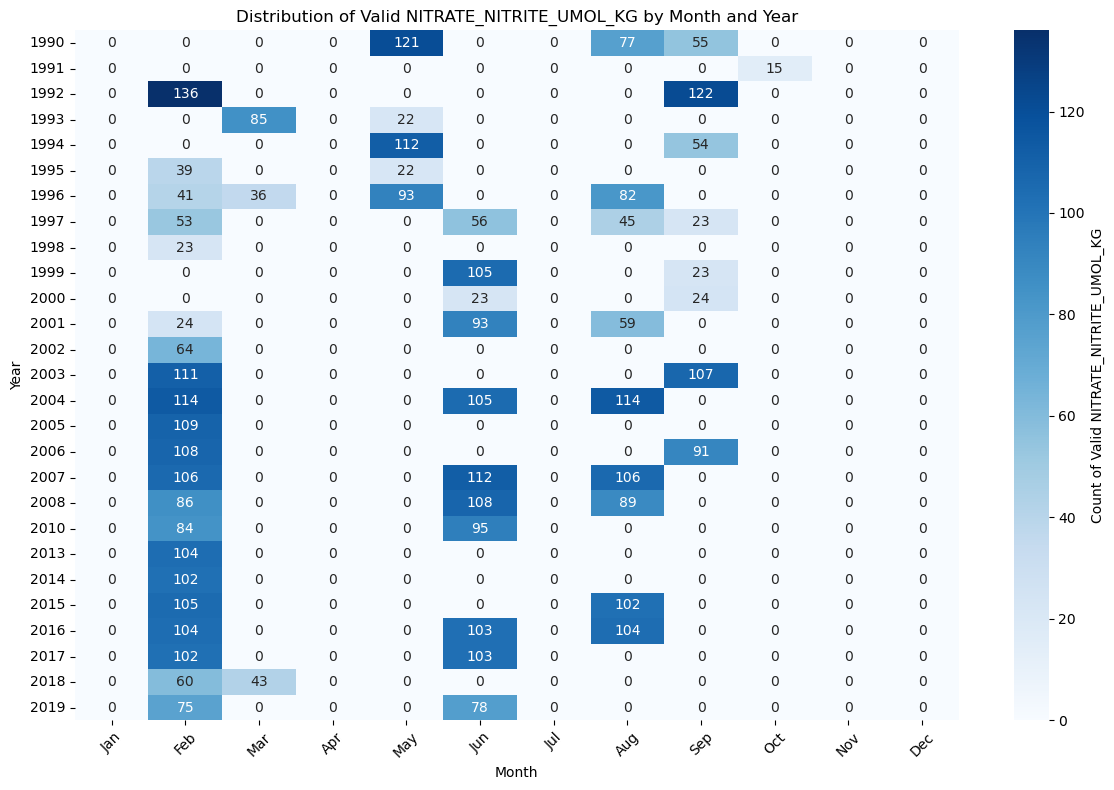

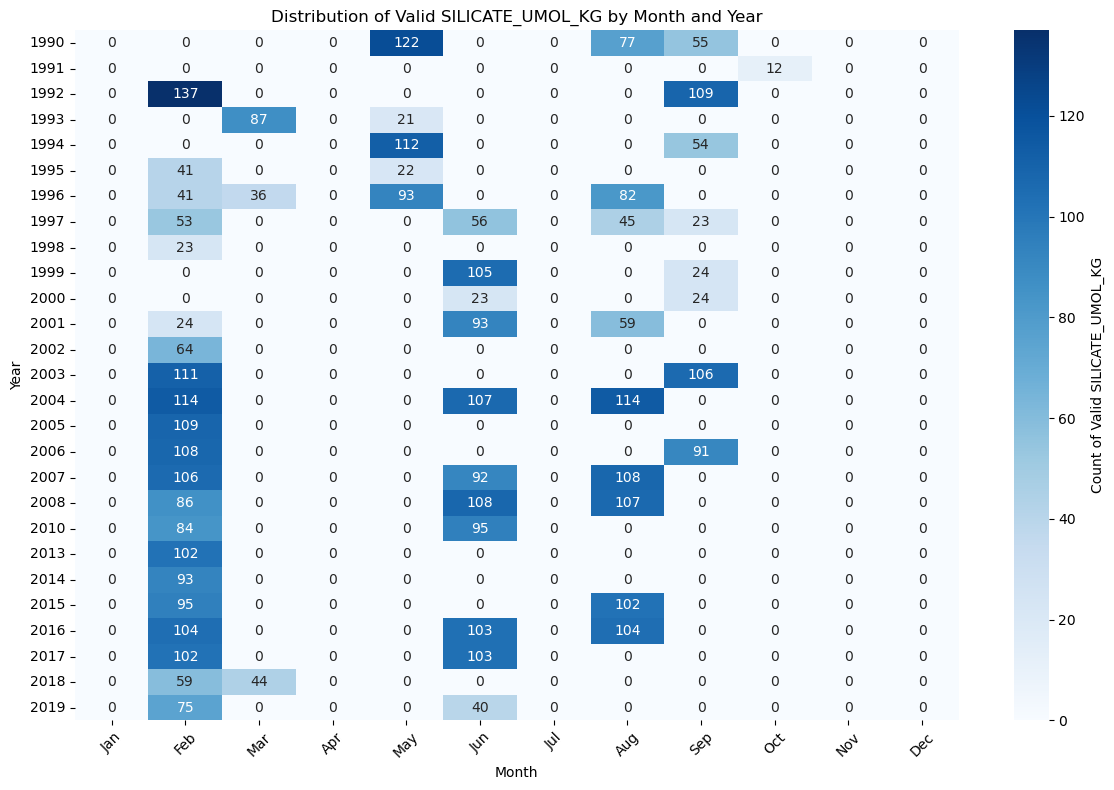

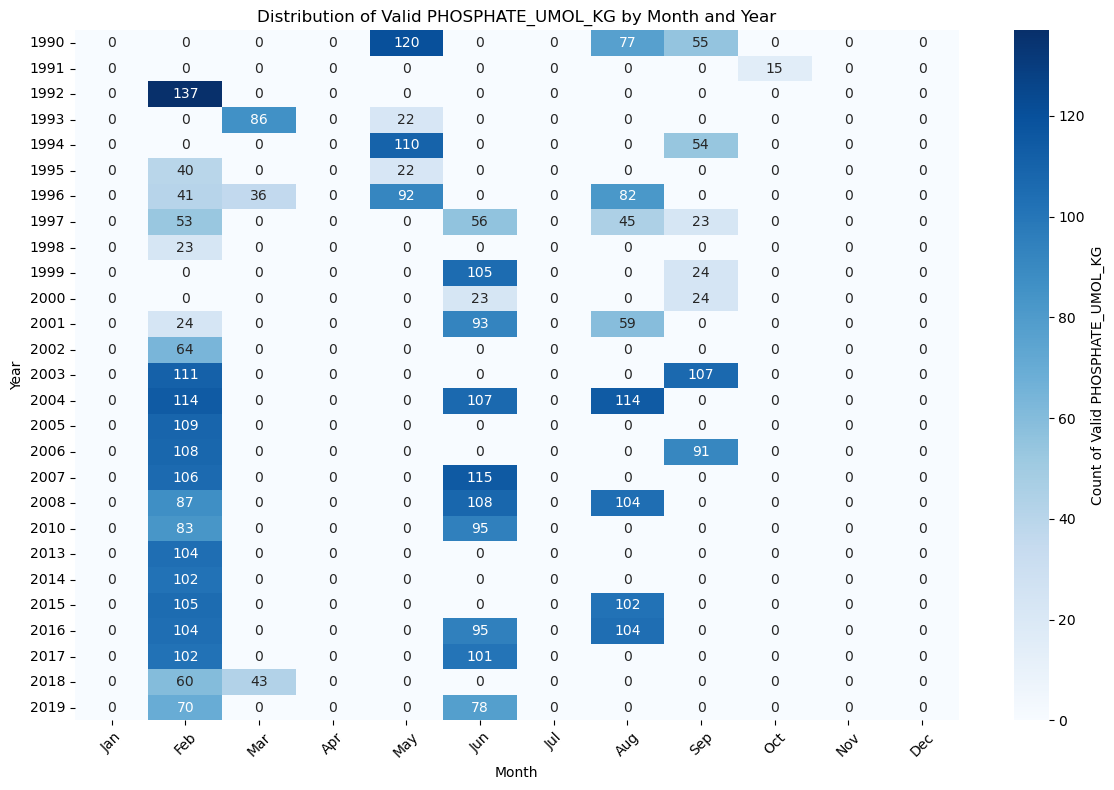

In [20]:
# Ensure all months are represented
def create_full_heatmap(ds, column):
    # Group by year and month, count non-null values
    if column =='OXYGEN_UMOL_KG':
        #use flags 
        df=ds[ds['OXYGEN_FLAG_W']==2]
    elif column =='DIC_UMOL_KG':
        df=ds[ds['DIC_FLAG_W']==2]
    elif column == 'TA_UMOL_KG':
        df=ds[ds['TA_FLAG_W']==2]
    elif column =='NITRATE_NITRITE_UMOL_KG':
        df=ds[ds['NITRATE_NITRITE_FLAG_W']==2]
    elif column == 'SILICATE_UMOL_KG':
        df=ds[ds['SILICATE_FLAG_W']==2]
    elif column == 'PHOSPHATE_UMOL_KG':
        df=ds[ds['PHOSPHATE_FLAG_W']==2]
    else:
        df=ds
        
    counts = df.groupby(['YEAR_UTC', 'MONTH_UTC'])[column].count().unstack(fill_value=0)
    
    # Ensure all months (1-12) are present
    counts = counts.reindex(columns=range(1, 13), fill_value=0)
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(counts, cmap='Blues', annot=True, fmt='d',
                cbar_kws={'label': f'Count of Valid {column}'})
    
    plt.title(f'Distribution of Valid {column} by Month and Year')
    plt.xlabel('Month')
    plt.ylabel('Year')
    plt.xticks(ticks=[i + 0.5 for i in range(12)],
               labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
               rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    #plt.savefig(f'heatmap_{column}_valid_count_2.png', format='png', bbox_inches='tight', transparent=False, dpi=150)
    plt.close()

# Example usage for multiple columns
columns_to_plot = ['OXYGEN_UMOL_KG', 'DIC_UMOL_KG', 'TA_UMOL_KG', 'NITRATE_NITRITE_UMOL_KG', 'SILICATE_UMOL_KG', 'PHOSPHATE_UMOL_KG']

for column in columns_to_plot:
    create_full_heatmap(df, column)

# now for each station

In [26]:
def plot_station_sample_counts(df):
    variables_flags = {
        'OXYGEN_UMOL_KG': 'OXYGEN_FLAG_W',
        'DIC_UMOL_KG': 'DIC_FLAG_W',
        'TA_UMOL_KG': 'TA_FLAG_W',
        'NITRATE_NITRITE_UMOL_KG': 'NITRATE_NITRITE_FLAG_W',
        'SILICATE_UMOL_KG': 'SILICATE_FLAG_W',
        'PHOSPHATE_UMOL_KG': 'PHOSPHATE_FLAG_W'
    }

    station_counts = {}
    for var, flag in variables_flags.items():
        valid_df = df[df[flag] == 2]
        counts = valid_df.groupby('STATION_ID')[var].count()
        station_counts[var] = counts

    counts_df = pd.DataFrame(station_counts).fillna(0).astype(int)

    plt.figure(figsize=(12, 8))
    sns.heatmap(counts_df, annot=True, fmt='d', cmap='YlGnBu',
                cbar_kws={'label': 'Number of Valid Samples'})
    plt.title('Valid Sample Counts per Station for Each Variable')
    plt.xlabel('Variable')
    plt.ylabel('Station Number')
    plt.tight_layout()
    plt.show()

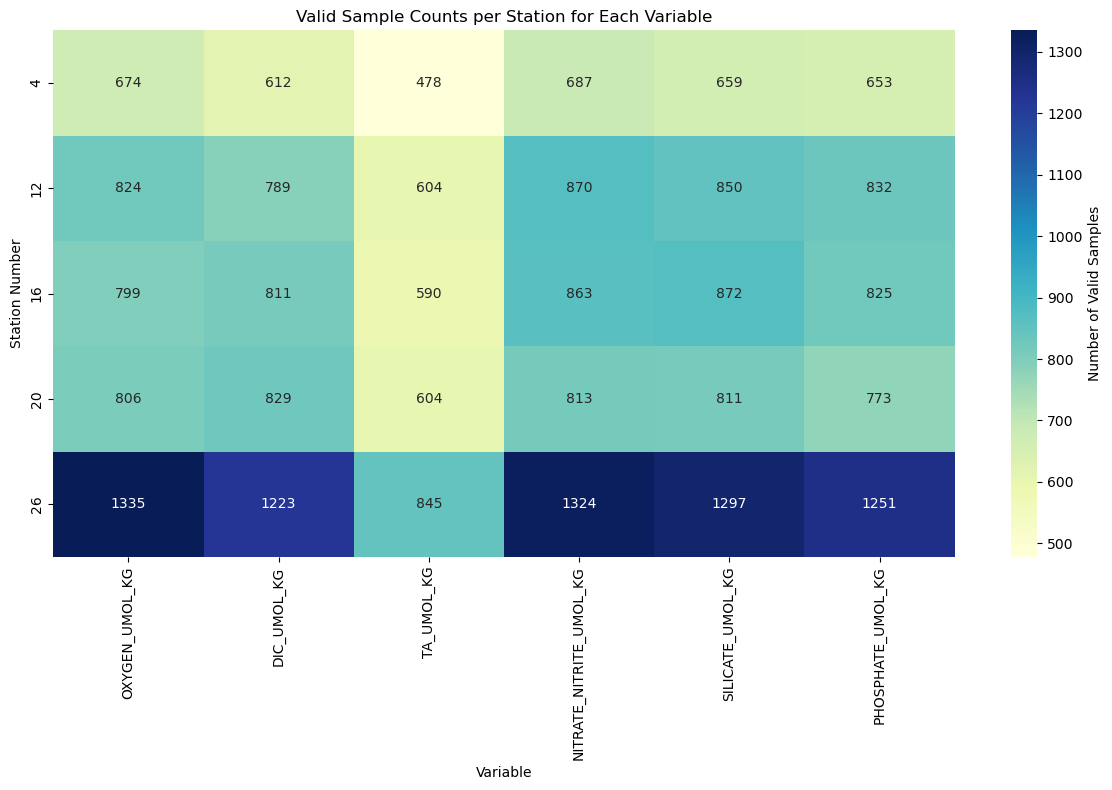

In [27]:
plot_station_sample_counts(df)

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_valid_data_points_per_year(df):
    variables_flags = {
        'OXYGEN_UMOL_KG': 'OXYGEN_FLAG_W',
        'DIC_UMOL_KG': 'DIC_FLAG_W',
        'TA_UMOL_KG': 'TA_FLAG_W',
        'NITRATE_NITRITE_UMOL_KG': 'NITRATE_NITRITE_FLAG_W',
        'SILICATE_UMOL_KG': 'SILICATE_FLAG_W',
        'PHOSPHATE_UMOL_KG': 'PHOSPHATE_FLAG_W'
    }

    yearly_counts = pd.DataFrame()

    for var, flag in variables_flags.items():
        valid_df = df[df[flag] == 2]
        counts = valid_df.groupby('YEAR_UTC')[var].count()
        yearly_counts[var] = counts

    plt.figure(figsize=(12, 8))
    for var in yearly_counts.columns:
        plt.plot(yearly_counts.index, yearly_counts[var], '.-', label=var)

    plt.title('Number of Valid Data Points per Year for Each Variable')
    plt.xlabel('Year')
    plt.ylabel('Number of Valid Samples')
    plt.legend(title='Variable')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

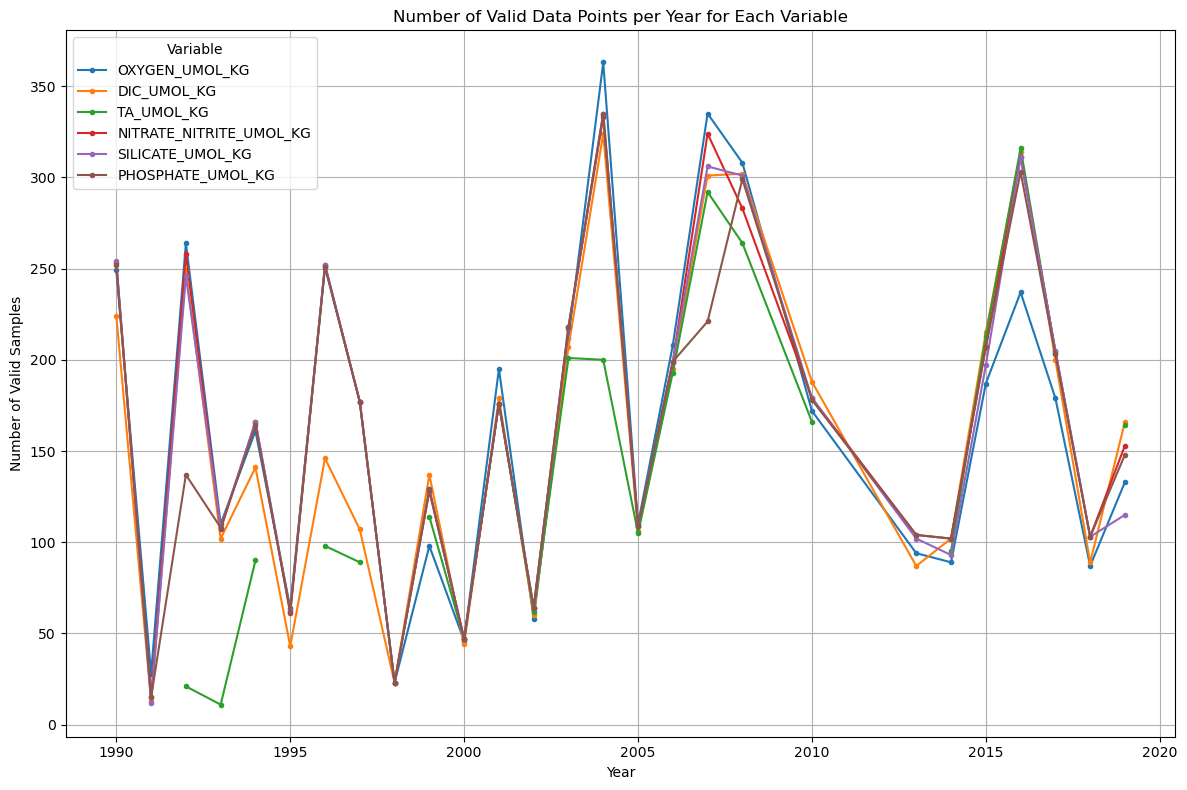

In [37]:
 plot_valid_data_points_per_year(df)